In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection from multiple sources

In [2]:

usd_inr = yf.download("USDINR=X", start='2024-01-01', end='2024-12-31', interval='1wk', auto_adjust=False)
print(usd_inr.head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open   Volume
Ticker       USDINR=X   USDINR=X   USDINR=X   USDINR=X   USDINR=X USDINR=X
Date                                                                      
2024-01-01  83.240601  83.240601  83.360298  83.035004  83.248596        0
2024-01-08  83.076103  83.076103  83.189697  82.779099  83.191101        0
2024-01-15  83.160599  83.160599  83.230797  82.809998  82.872101        0
2024-01-22  83.146103  83.146103  83.222504  81.513702  83.124702        0
2024-01-29  82.927597  82.927597  83.212601  82.815002  83.121300        0


In [42]:
usd_inr.head()

,Date_,Adj Close_USDINR=X,Close_USDINR=X,High_USDINR=X,Low_USDINR=X,Open_USDINR=X,Volume_USDINR=X
0,2024-01-01,83.240601,83.240601,83.360298,83.035004,83.248596,0
1,2024-01-08,83.076103,83.076103,83.189697,82.779099,83.191101,0
2,2024-01-15,83.160599,83.160599,83.230797,82.809998,82.872101,0
3,2024-01-22,83.146103,83.146103,83.222504,81.513702,83.124702,0
4,2024-01-29,82.927597,82.927597,83.212601,82.815002,83.121300,0


In [4]:
usd_inr.reset_index(inplace=True)

In [5]:
usd_inr.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
0,2024-01-01,83.240601,83.240601,83.360298,83.035004,83.248596,0
1,2024-01-08,83.076103,83.076103,83.189697,82.779099,83.191101,0
2,2024-01-15,83.160599,83.160599,83.230797,82.809998,82.872101,0
3,2024-01-22,83.146103,83.146103,83.222504,81.513702,83.124702,0
4,2024-01-29,82.927597,82.927597,83.212601,82.815002,83.121300,0


In [6]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   (Date, )               53 non-null     datetime64[ns]
 1   (Adj Close, USDINR=X)  53 non-null     float64       
 2   (Close, USDINR=X)      53 non-null     float64       
 3   (High, USDINR=X)       53 non-null     float64       
 4   (Low, USDINR=X)        53 non-null     float64       
 5   (Open, USDINR=X)       53 non-null     float64       
 6   (Volume, USDINR=X)     53 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.0 KB


In [7]:
gold_inr = yf.download("GC=F", start='2024-01-01', end='2024-12-31', interval='1wk', auto_adjust=False)
print(gold_inr.head())


[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker             GC=F         GC=F         GC=F         GC=F         GC=F   
Date                                                                          
2024-01-01  2042.400024  2042.400024  2073.699951  2034.199951  2063.500000   
2024-01-08  2046.699951  2046.699951  2057.000000  2014.300049  2019.099976   
2024-01-15  2026.500000  2026.500000  2054.800049  2002.599976  2051.699951   
2024-01-22  2016.800049  2016.800049  2033.199951  2012.099976  2021.300049   
2024-01-29  2036.099976  2036.099976  2064.500000  2025.199951  2025.199951   

Price       Volume  
Ticker        GC=F  
Date                
2024-01-01     215  
2024-01-08    1062  
2024-01-15    2724  
2024-01-22     877  
2024-01-29  181457  


In [43]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.exchange-rates.org/precious-metals/gold-price/india/2024"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the historical prices
table = soup.find("table")

# Parse the table into a DataFrame
df = pd.read_html(str(table))[0]
# print(df.head())


# # Read HTML table
# df = pd.read_html("https://www.exchange-rates.org/precious-metals/gold-price/india/2024")[0]

# Flatten MultiIndex columns
df.columns = [col[1] for col in df.columns]  # take only second level (e.g. 'Gold Price (24 Karat)')

# Rename the first column to 'Date'
df.rename(columns={'Unnamed: 0_level_1': 'Date'}, inplace=True)

df = df[df['Date'].str.match(r'^\d{1,2} \w{3}$', na=False)]

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'] + ' 2024', format='%d %b %Y')

# Set Date as index
df.set_index('Date', inplace=True)

# Clean ₹ symbols and commas
for col in df.columns:
    df[col] = df[col].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Convert 24K gold price from per ounce to per gram
df['24K_gram'] = df['Gold Price (24 Karat)'] / 31.1034768

# Resample weekly (end of week Monday)
weekly_avg = df['24K_gram'].resample('W-MON').last().round(2)

# Print or export
print("Weekly Average 24K Gold Price (₹/gram):")
print(weekly_avg.tail())


Weekly Average 24K Gold Price (₹/gram):
Date
2024-12-09    7258.93
2024-12-16    7242.79
2024-12-23    7157.08
2024-12-30    7184.05
2025-01-06    7221.89
Freq: W-MON, Name: 24K_gram, dtype: float64


/tmp/ipython-input-868467608.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [13]:
df.head(5)

,Gold Price (24 Karat),Gold Price (22 Karat),Gold Price (18 Karat),Gold Price (14 Karat),Gold Price (10 Karat),24K_gram
Date,,,,,,
2024-01-01,171905.0,157580.0,128929.0,100278.0,71627.0,5526.874089
2024-01-02,171465.0,157176.0,128599.0,100021.0,71444.0,5512.727760
2024-01-03,170149.0,155970.0,127612.0,99254.0,70895.0,5470.417378
2024-01-04,170079.0,155906.0,127559.0,99213.0,70866.0,5468.166826
2024-01-05,170171.0,155990.0,127628.0,99266.0,70905.0,5471.124694


In [14]:
df.columns

Index(['Gold Price (24 Karat)', 'Gold Price (22 Karat)',
       'Gold Price (18 Karat)', 'Gold Price (14 Karat)',
       'Gold Price (10 Karat)', '24K_gram'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2024-01-01 to 2024-12-31
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gold Price (24 Karat)  262 non-null    float64
 1   Gold Price (22 Karat)  262 non-null    float64
 2   Gold Price (18 Karat)  262 non-null    float64
 3   Gold Price (14 Karat)  262 non-null    float64
 4   Gold Price (10 Karat)  262 non-null    float64
 5   24K_gram               262 non-null    float64
dtypes: float64(6)
memory usage: 14.3 KB


In [41]:
# Step 1: Resample into weekly average, using Monday as week-end
weekly_avg = df['24K_gram'].resample('W-MON').last().round(2)

# Step 2: Filter weeks that are within the daily data's date range
start_date = df.index.min()
end_date = df.index.max()

weekly_avg_filtered = weekly_avg[(weekly_avg.index >= start_date) & (weekly_avg.index <= end_date)]

# Step 3: Optional – Limit to first 53 weeks if needed
weekly_53 = weekly_avg_filtered.head(53)

# Output
print(weekly_53.head())

Date
2024-01-01    5526.87
2024-01-08    5417.79
2024-01-15    5471.25
2024-01-22    5400.91
2024-01-29    5429.20
Freq: W-MON, Name: 24K_gram, dtype: float64


In [17]:
usd_inr.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
48,2024-12-02,84.666000,84.666000,84.840698,84.442398,84.556999,0
49,2024-12-09,84.802002,84.802002,85.051102,84.672997,84.666000,0
50,2024-12-16,84.945000,84.945000,85.339302,84.693001,84.802002,0
51,2024-12-23,85.386002,85.386002,85.817802,81.507401,84.945000,0
52,2024-12-30,85.786598,85.786598,85.799797,77.501701,85.386002,0


In [22]:
weekly_53.nunique()

53

In [24]:
weekly_df = weekly_53.reset_index()
weekly_df.columns = ['Date', '24K Price (₹/gram)']

# Output
print(weekly_df.head())

        Date  24K Price (₹/gram)
0 2024-01-01             5526.87
1 2024-01-08             5417.79
2 2024-01-15             5471.25
3 2024-01-22             5400.91
4 2024-01-29             5429.20


**DATA** **MERGING**

In [27]:
usd_inr.head(2)

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
0,2024-01-01,83.240601,83.240601,83.360298,83.035004,83.248596,0
1,2024-01-08,83.076103,83.076103,83.189697,82.779099,83.191101,0


In [25]:
type(usd_inr)

pandas.core.frame.DataFrame

In [26]:
type(weekly_df)

pandas.core.frame.DataFrame

In [32]:
weekly_df.columns

Index(['24K Price (₹/gram)'], dtype='object')

# Flatten the MultiIndex columns

In [37]:
usd_inr.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in usd_inr.columns]

In [38]:
usd_inr.columns

Index(['Date_', 'Adj Close_USDINR=X', 'Close_USDINR=X', 'High_USDINR=X',
       'Low_USDINR=X', 'Open_USDINR=X', 'Volume_USDINR=X'],
      dtype='object')

In [36]:
weekly_df.columns

Index(['24K Price (₹/gram)'], dtype='object')

In [46]:
# Reset index for weekly_df
weekly_df_reset = weekly_df.reset_index()

# Select only essential columns
weekly_df_filtered = weekly_df_reset[["24K Price (₹/gram)"]]  # replace with actual column names
usd_inr_filtered = usd_inr[["Date_",'Close_USDINR=X']]  # or other columns you want

# Concatenate side-by-side
final_df = pd.concat([weekly_df_filtered, usd_inr_filtered], axis=1)


In [49]:
final_df.rename(columns={"Close_USDINR=X": "usd_to_inr"}, inplace=True)

In [50]:
final_df.head()

,24K Price (₹/gram),Date_,usd_to_inr
0,5526.87,2024-01-01,83.240601
1,5417.79,2024-01-08,83.076103
2,5471.25,2024-01-15,83.160599
3,5400.91,2024-01-22,83.146103
4,5429.20,2024-01-29,82.927597


from matplotlib import pyplot as plt
_df_0['24K Price (₹/gram)'].plot(kind='hist', bins=20, title='24K Price (₹/gram)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['usd_to_inr'].plot(kind='hist', bins=20, title='usd_to_inr')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='24K Price (₹/gram)', y='usd_to_inr', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_']
  ys = series['24K Price (₹/gram)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_')
_ = plt.ylabel('24K Price (₹/gram)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_']
  ys = series['usd_to_inr']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_')
_ = plt.ylabel('usd_to_inr')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date_']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date_'}, axis=1)
              .sort_values('Date_', ascending=True))
  xs = counted['Date_']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date_']
  ys = series['24K Price (₹/gram)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date_', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date_')
_ = plt.ylabel('24K Price (₹/gram)')

from matplotlib import pyplot as plt
_df_7['24K Price (₹/gram)'].plot(kind='line', figsize=(8, 4), title='24K Price (₹/gram)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['usd_to_inr'].plot(kind='line', figsize=(8, 4), title='usd_to_inr')
plt.gca().spines[['top', 'right']].set_visible(False)

# Data Analysis

EDA
- handling missing values
- handling duplicates
- handling outliers
- Encoding categorical features
- normization vs standardizations

In [51]:
final_df.isna().sum()

,0
24K Price (₹/gram),0
Date_,0
usd_to_inr,0


In [52]:
final_df.duplicated().sum()

np.int64(0)

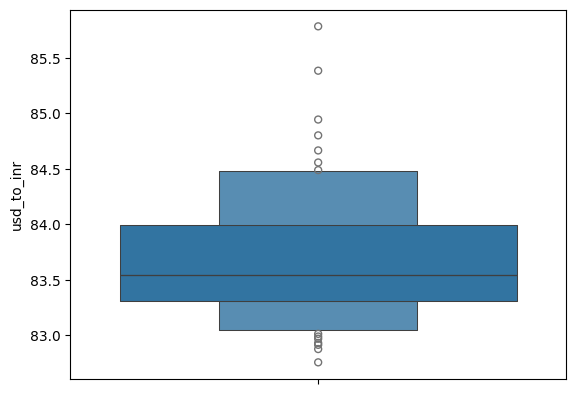

In [55]:
sns.boxenplot(final_df['usd_to_inr'])
plt.show()

In [56]:
final_df['usd_to_inr'].max()

85.7865982055664

In [57]:
final_df['usd_to_inr'].min()

82.7522964477539

In [59]:
final_df['usd_to_inr'].median()

83.54499816894531

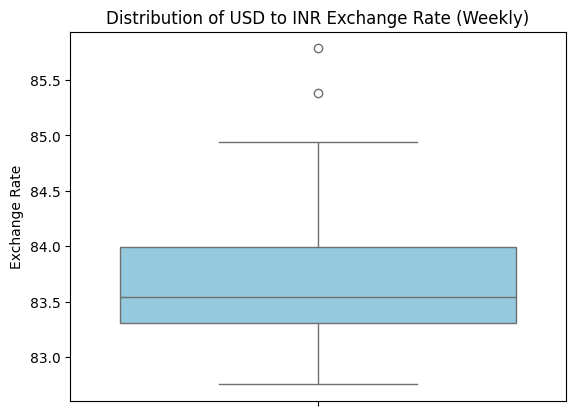

In [60]:
sns.boxplot(data=final_df, y='usd_to_inr', color='skyblue')
plt.title("Distribution of USD to INR Exchange Rate (Weekly)")
plt.ylabel("Exchange Rate")
plt.show()


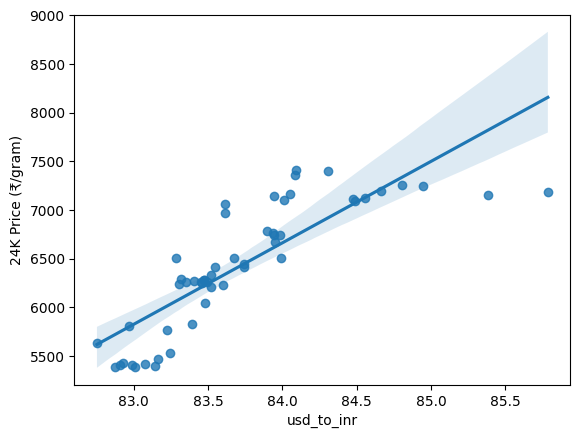

In [61]:
sns.regplot(x='usd_to_inr', y =final_df['24K Price (₹/gram)'],data=final_df)
plt.show()

# Mdel training

In [63]:
x = final_df[['usd_to_inr']]
y = final_df[['24K Price (₹/gram)']]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [67]:
x_train.shape,x_test.shape

((47, 1), (6, 1))

In [68]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [69]:
x_train_scaled = scaler.fit_transform(x_train)

In [70]:
x_train_scaled

array([[-0.4753469 ],
       [ 1.91603898],
       [-0.87974107],
       [ 0.36700953],
       [-0.36423188],
       [-1.24606136],
       [-0.33998365],
       [-1.09189238],
       [ 0.28432838],
       [-1.21933494],
       [-0.15146399],
       [-0.17182302],
       [ 0.92354507],
       [ 0.35503362],
       [ 1.69379708],
       [-0.25979254],
       [-1.49178076],
       [-0.63775672],
       [ 0.049328  ],
       [ 0.34602206],
       [-0.40604082],
       [-0.7546344 ],
       [-0.73287621],
       [ 1.20624748],
       [-0.30097304],
       [ 0.43025651],
       [ 0.46196301],
       [ 0.05011058],
       [ 1.18371855],
       [-0.98853205],
       [-0.60807783],
       [-0.85721215],
       [ 0.36342861],
       [ 0.42186152],
       [-0.29537638],
       [ 1.48242836],
       [-1.16027359],
       [-0.371536  ],
       [-0.39283176],
       [ 3.22402082],
       [-0.66169667],
       [-1.30527685],
       [ 0.57448905],
       [-0.56394486],
       [-0.05883455],
       [ 2

In [71]:
x_test_scaled = scaler.transform(x_test)

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [73]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [74]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [75]:
regressor.coef_

array([[512.28686049]])

In [76]:
regressor.intercept_

array([6411.29361702])

In [79]:
# y =mx+b
m= regressor.coef_[0][0]
b= regressor.intercept_[0]
m,b

(np.float64(512.2868604850793), np.float64(6411.293617021278))

In [82]:
x_train_predict = regressor.predict(x_train_scaled)

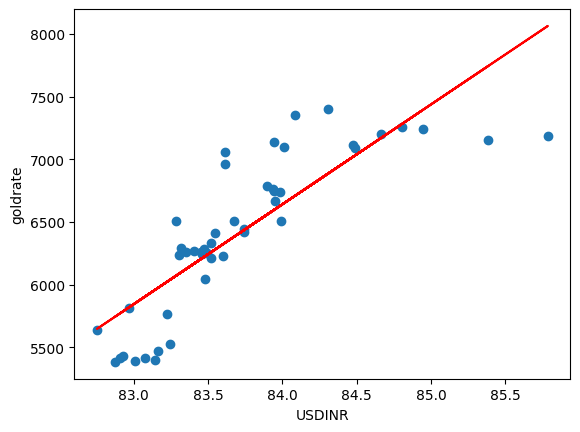

In [83]:
plt.scatter(x_train,y_train)
plt.plot(x_train,x_train_predict,color ='r')
plt.xlabel("USDINR")
plt.ylabel("goldrate")
plt.show()

In [85]:
x_test_predict = regressor.predict(x_test_scaled)
x_test_predict

array([[6218.57338649],
       [6683.3039316 ],
       [7083.93790108],
       [6157.18597241],
       [6713.31731107],
       [5832.58468272]])

In [86]:
y_test

,24K Price (₹/gram)
19,6277.53
41,7160.00
47,7117.15
12,5826.78
43,7413.09
5,5404.25


In [87]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,x_test_predict)

169023.0984353229

# Hyper parameter tuning

In [94]:
from sklearn.model_selection import RandomizedSearchCV
para_space = {
    'copy_X':[True,False],
    'fit_intercept':[True,False],
    'n_jobs':[1,5,10,15,None],
    'positive':[True,False]
}

In [95]:
search = RandomizedSearchCV(regressor,para_space, n_iter=50, cv=5)

In [96]:
search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [97]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [101]:
tuned_model = LinearRegression(positive=True, n_jobs=1, fit_intercept=True, copy_X=True)

In [102]:
tuned_model.fit(x_train_scaled,y_train)

LinearRegression(n_jobs=1, positive=True)

In [107]:
tuned_model.coef_

array([[512.28686049]])

In [108]:
tuned_model.intercept_

array([6411.29361702])

# MLOps
- saved the model
- build interface
- connecet model and interface

In [109]:
import pickle

In [110]:
pickle.dump(regressor,open('regressor.pkl','wb'))

In [111]:
model = pickle.load(open('regressor.pkl','rb'))

In [112]:
model.coef_

array([[512.28686049]])

In [113]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [116]:
def calculategoldrate(usd_inr):
  scaled_input = scaler.transform(np.array(usd_inr).reshape(1,-1))
  return regressor.predict(scaled_input)[0][0].round(2)


In [117]:
calculategoldrate(80)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.float64(3455.76)

In [122]:
import gradio as gr
sample= gr.Interface(
    fn= calculategoldrate,
    inputs = ["number"],
    outputs =["number"],
    title ='How much is gold rate now?'
)
sample.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4f249930d239494b66.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
